# TP1 KMEANS

On nous propose de coder l'algorithme des kmeans afin de faire du clustering sur 2 classes puis plus de 2 classes.
Plus tard, on utilisera notre algorithme pour segmenter une image sur l'information de couleur.

In [174]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial
from skimage import io

In [175]:
# mean = [1,2,3,4]
# sd = [0.25, 0.25, 0.1, 0.2]
clusters = 5
dim = 2
nb = 50
K= clusters
mean = np.random.randint(5, size=clusters)
mean = mean.T * np.random.random(size=clusters)
sd = np.random.random(size=clusters)
path_image = "fruits.jpg"
# print(mean)

## Fonctions à utiliser pour le clustering

In [176]:
def gen_points(mean=1,sd=0.5, nb=100, dim=2, clusters=2):
    size = []
    # for i in range(0,dim):
    size.append(nb)
    size.append(dim)
    points = np.random.normal(mean[0],sd[0],size=size)
    for i in range(1,clusters):
        points = np.concatenate((points,np.random.normal(mean[i],sd[i],size=size)),axis=0)
    
    return points, mean

In [177]:
def distance(points,Pc):   
    return scipy.spatial.distance.cdist(points[:,:], Pc[:,:])

In [178]:
def kmeans(points = [0,0], K = 1):
    # Initialisation K prototypes
    dim = points.shape[1]
    N = points.shape[0]
    iter = 0
    eps = 0.1
    Pc_index = []
    Pc_save = np.zeros([K,dim])
    clusters = []

    for i in range(0,K):
        Pc_index.append(np.random.randint(0,N))
    Pc = points[Pc_index,:]

    while (np.mean(distance(Pc,Pc_save)) > eps and iter < 3):
        iter += 1
        Pc_save = Pc
        # print(Pc)
        # print(points[:,:Pc.shape[0]])
        dist = distance(points=points[:,:Pc.shape[1]],Pc=Pc)
        clust = np.argmin(dist, axis=1)
        clust = np.expand_dims(clust, axis=0)
        points = np.append(points[:,:Pc.shape[1]], clust.T, axis=1)
        # print(points)
        Pc = np.zeros([K,dim])
        index = np.array([])

        for n in range(0,N):
            for k in range(0,K):
                index = np.append(index, (clust==k).sum())
                if points[n,-1] == k:
                    # print(points)
                    # print(Pc)
                    Pc[k,:] = np.add(Pc[k,:], points[n,:-1])

        for k in range(0,K):
            Pc[k,:] = np.divide(Pc[k,:],index[k])

        # print(Pc)
        indice = points[:,-1]
        points = points[:,:-1]
    return Pc, indice, points


In [179]:
colors=['red', 'green','yellow','blue','purple', 'orange']
def visualisation(points, index, Pc=[0,0], K=1):
    if(points.shape[1]==2):
        # for k in range(0,K):
        for n in range(0,len(points)):
            plt.plot(points[n,0], points[n,1], 'o', color=colors[int(index[n])])
        plt.plot(Pc[:,0],Pc[:,1],'r+')
        plt.grid(True)
        plt.axis([min(mean)-1,max(mean)+1,min(mean)-1,max(mean)+1])

In [180]:
def img_2_mat(my_img):
    mat = my_img.reshape(my_img.shape[0]*my_img.shape[1],my_img.shape[2])
    return mat

In [181]:
def mat_2_img(mat,my_img):
    img_seg = mat.reshape(my_img.shape[0], my_img.shape[1], my_img.shape[2])
    return img_seg

In [182]:
def kmeans_image(path_image, K):
    my_img = io.imread(path_image)
    imgplot = plt.imshow(my_img)
    Mat = img_2_mat(my_img)
    
    Pc, index, clusters = kmeans(Mat, K)

    for k in range(Mat.shape[0]):
        Mat[k,:] = np.floor(Pc[index[k],:])

    img_seg = mat_2_img(Mat, my_img)

    io.imsave(path_image.split('.')[0] + "_%d.jpg" % K, img_seg)
    imgplot = plt.imshow(img_seg)
    return Pc, index, img_seg


In [183]:
points, mean = gen_points(mean,sd,nb,dim,clusters)
# print(points.shape)
# print(points.mean(axis=0))
# print(points)

In [184]:
dist = distance(points,points)
# print(dist)

In [185]:
Pc, index, clusters = kmeans(points,K=K)
# print(index)
# print(clusters)


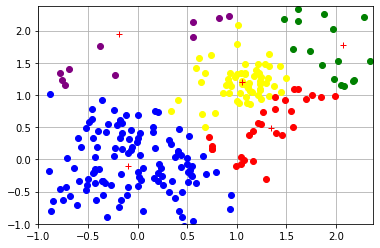

In [186]:
visualisation(clusters, index, Pc, K=K)
# print(Pc)
# print(mean)

KeyboardInterrupt: 

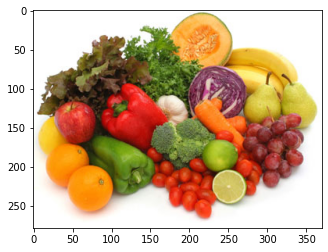

In [187]:
Pc, index, img_seg = kmeans_image(path_image=path_image, K=250)

In [ ]:
print(index.shape)
print(Pc)
print(img_seg)

(103230,)
[[252.69560225 251.67998184 249.86355505]
 [ 69.54698482  50.76095445  17.63930586]
 [228.4210873  174.61140875  69.5397857 ]
 [154.87751731  83.70097198  45.64258942]
 [         nan          nan          nan]]
[[[252 251 249]
  [252 251 249]
  [252 251 249]
  ...
  [252 251 249]
  [252 251 249]
  [252 251 249]]

 [[252 251 249]
  [252 251 249]
  [252 251 249]
  ...
  [252 251 249]
  [252 251 249]
  [252 251 249]]

 [[252 251 249]
  [252 251 249]
  [252 251 249]
  ...
  [252 251 249]
  [252 251 249]
  [252 251 249]]

 ...

 [[252 251 249]
  [252 251 249]
  [252 251 249]
  ...
  [252 251 249]
  [252 251 249]
  [252 251 249]]

 [[252 251 249]
  [252 251 249]
  [252 251 249]
  ...
  [252 251 249]
  [252 251 249]
  [252 251 249]]

 [[252 251 249]
  [252 251 249]
  [252 251 249]
  ...
  [252 251 249]
  [252 251 249]
  [252 251 249]]]
